# Decision Tree / Random Forest

Binary classification of the risk involved with each loan handed out. Features of the loan includes the month, loan amount, term length, and product type. Features of the client are age, gender, education, presence of children, region, income, family status, phone operator, and whether the loanee is an existing client. For this dataset, the Decision Tree and Random Forest algorithms will be used to predict whether a client is "good" or "bad" based on the features above.

### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns

### Import Dataset(s)

In [2]:
df = pd.read_csv('../data/client-risk.csv')

In [3]:
df.head()

,month,credit_amount,credit_term,age,sex,education,product_type,having_children_flg,region,income,family_status,phone_operator,is_client,bad_client_target
0,1,7000,12,39,male,Secondary special education,Cell phones,0,2,21000,Another,0,0,0
1,1,19000,6,20,male,Secondary special education,Household appliances,1,2,17000,Another,3,1,0
2,1,29000,12,23,female,Secondary special education,Household appliances,0,2,31000,Another,2,0,0
3,1,10000,12,30,male,Secondary special education,Cell phones,1,2,31000,Unmarried,3,1,0
4,1,14500,12,25,female,Higher education,Cell phones,0,2,26000,Married,0,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1723 entries, 0 to 1722
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   month                1723 non-null   int64 
 1   credit_amount        1723 non-null   int64 
 2   credit_term          1723 non-null   int64 
 3   age                  1723 non-null   int64 
 4   sex                  1723 non-null   object
 5   education            1723 non-null   object
 6   product_type         1723 non-null   object
 7   having_children_flg  1723 non-null   int64 
 8   region               1723 non-null   int64 
 9   income               1723 non-null   int64 
 10  family_status        1723 non-null   object
 11  phone_operator       1723 non-null   int64 
 12  is_client            1723 non-null   int64 
 13  bad_client_target    1723 non-null   int64 
dtypes: int64(10), object(4)
memory usage: 188.6+ KB


In [5]:
df.nunique()

month                   12
credit_amount          205
credit_term             22
age                     66
sex                      2
education                6
product_type            22
having_children_flg      2
region                   3
income                  76
family_status            3
phone_operator           5
is_client                2
bad_client_target        2
dtype: int64

### Exploratory Data Analysis

<Axes: xlabel='bad_client_target', ylabel='count'>

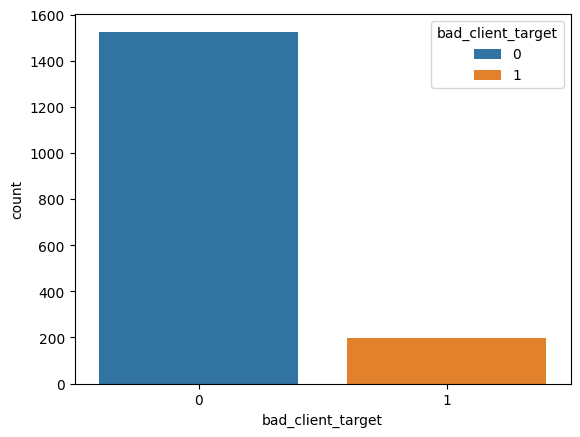

In [8]:
sns.countplot(data=df, x='bad_client_target', hue='bad_client_target')

As seen in the countplot above, the dataset is imbalanced. The majority of the data points are "good" clients.

<Axes: xlabel='income', ylabel='age'>

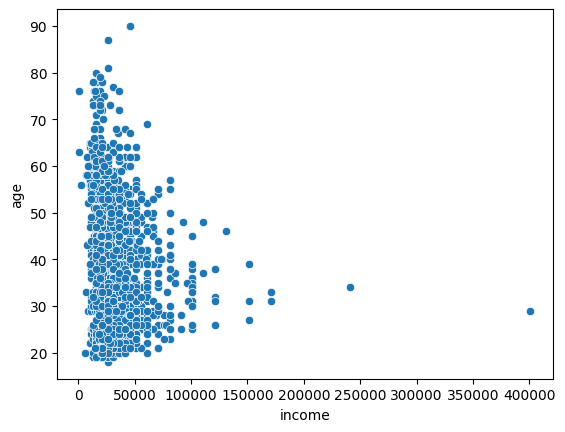

In [12]:
sns.scatterplot(data=df, x='income', y='age')

Income vs. Age shows that high-income earners are between the ages of 20 and 50. Every individual more than 50 years old does not have an income over 100,000.

<Axes: xlabel='income', ylabel='credit_amount'>

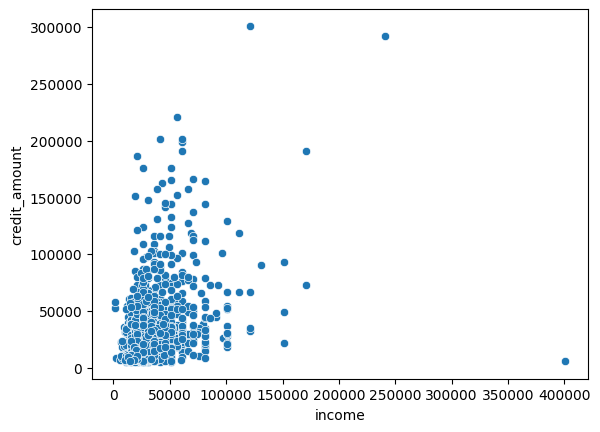

In [9]:
sns.scatterplot(data=df, x='income', y='credit_amount')

No visible relationship between income and credit amount.

<Axes: xlabel='income', ylabel='credit_term'>

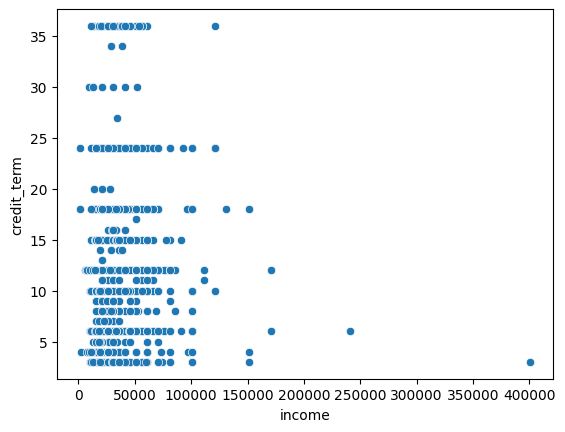

In [11]:
sns.scatterplot(data=df, x='income', y='credit_term')

The scatterplot shows that most of the loan requests are for terms less than 20 years.

<Axes: xlabel='income', ylabel='bad_client_target'>

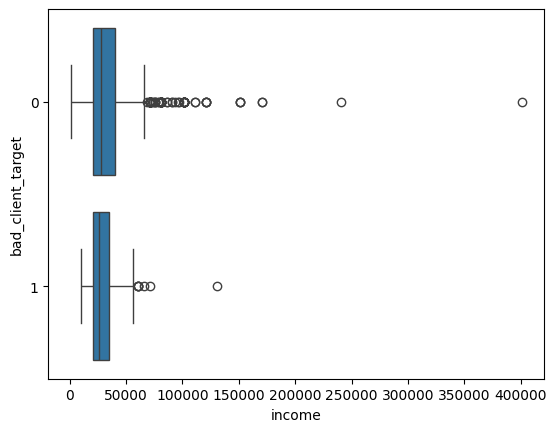

In [17]:
sns.boxplot(data=df, x='income', y='bad_client_target', orient='h')

<Axes: xlabel='credit_amount', ylabel='bad_client_target'>

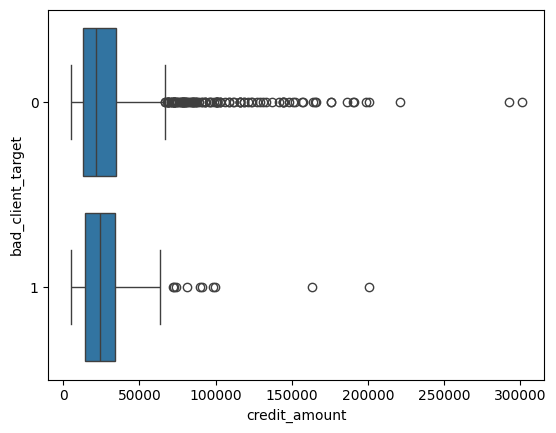

In [18]:
sns.boxplot(data=df, x='credit_amount', y='bad_client_target', orient='h')

No significant observations based on single feature comparisons with continuous variables.